In [1]:
# Importamos las librerías que vamos a necesitar
# Librerías generales
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow y sklearn
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Seleccionamos la ruta de la serie a predecir
ruta_serie = "./datasets/E162533-time-series-mantto.xlsx"

In [3]:
# Cargamos el dataset
dataframe = pd.read_excel(ruta_serie, usecols=[1])
dataframe

,dias_sig_mantto
0,120
1,119
2,118
3,117
4,116
...,...
1605,104
1606,103
1607,102
1608,101


# PREPARACIÓN DE LOS DATOS

In [4]:
dataframe.values
y = dataframe.values.reshape(-1, 1)
y

array([[120],
       [119],
       [118],
       ...,
       [102],
       [101],
       [100]], dtype=int64)

In [5]:
# Escalamos los datos para una mejor predicción
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)
y

array([[1.        ],
       [0.99212598],
       [0.98425197],
       ...,
       [0.85826772],
       [0.8503937 ],
       [0.84251969]])

In [6]:
# Generamos los datos para hacer la predicción
n_lookback = 60
n_forecast = 30

In [7]:
# Agregamos los valores a un nuevo arreglo para ingresarlo al modelo
X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

In [8]:
# lo convertimos en un arreglo de numpy pues es lo que el modelo interpretará
X = np.array(X)
Y = np.array(Y)

## Creación del modelo

In [9]:
# Creamos y compilamos el modelo, se seleccionaron estos tamaños pues fueron los que dieron mejores resultados
model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# Lo ajustamos para predecir los valores
history = model.fit(X, Y, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
48/48 - 4s - loss: 0.2232 - 4s/epoch - 88ms/step
Epoch 2/100
48/48 - 1s - loss: 0.0687 - 1s/epoch - 22ms/step
Epoch 3/100
48/48 - 1s - loss: 0.0664 - 1s/epoch - 22ms/step
Epoch 4/100
48/48 - 1s - loss: 0.0646 - 1s/epoch - 22ms/step
Epoch 5/100
48/48 - 1s - loss: 0.0618 - 1s/epoch - 22ms/step
Epoch 6/100
48/48 - 1s - loss: 0.0561 - 1s/epoch - 23ms/step
Epoch 7/100
48/48 - 1s - loss: 0.0474 - 1s/epoch - 22ms/step
Epoch 8/100
48/48 - 1s - loss: 0.0439 - 1s/epoch - 22ms/step
Epoch 9/100
48/48 - 1s - loss: 0.0427 - 1s/epoch - 22ms/step
Epoch 10/100
48/48 - 1s - loss: 0.0422 - 1s/epoch - 22ms/step
Epoch 11/100
48/48 - 1s - loss: 0.0414 - 1s/epoch - 22ms/step
Epoch 12/100
48/48 - 1s - loss: 0.0411 - 1s/epoch - 22ms/step
Epoch 13/100
48/48 - 1s - loss: 0.0412 - 1s/epoch - 23ms/step
Epoch 14/100
48/48 - 1s - loss: 0.0402 - 1s/epoch - 22ms/step
Epoch 15/100
48/48 - 1s - loss: 0.0397 - 1s/epoch - 22ms/step
Epoch 16/100
48/48 - 1s - loss: 0.0392 - 1s/epoch - 22ms/step
Epoch 17/100
48/4

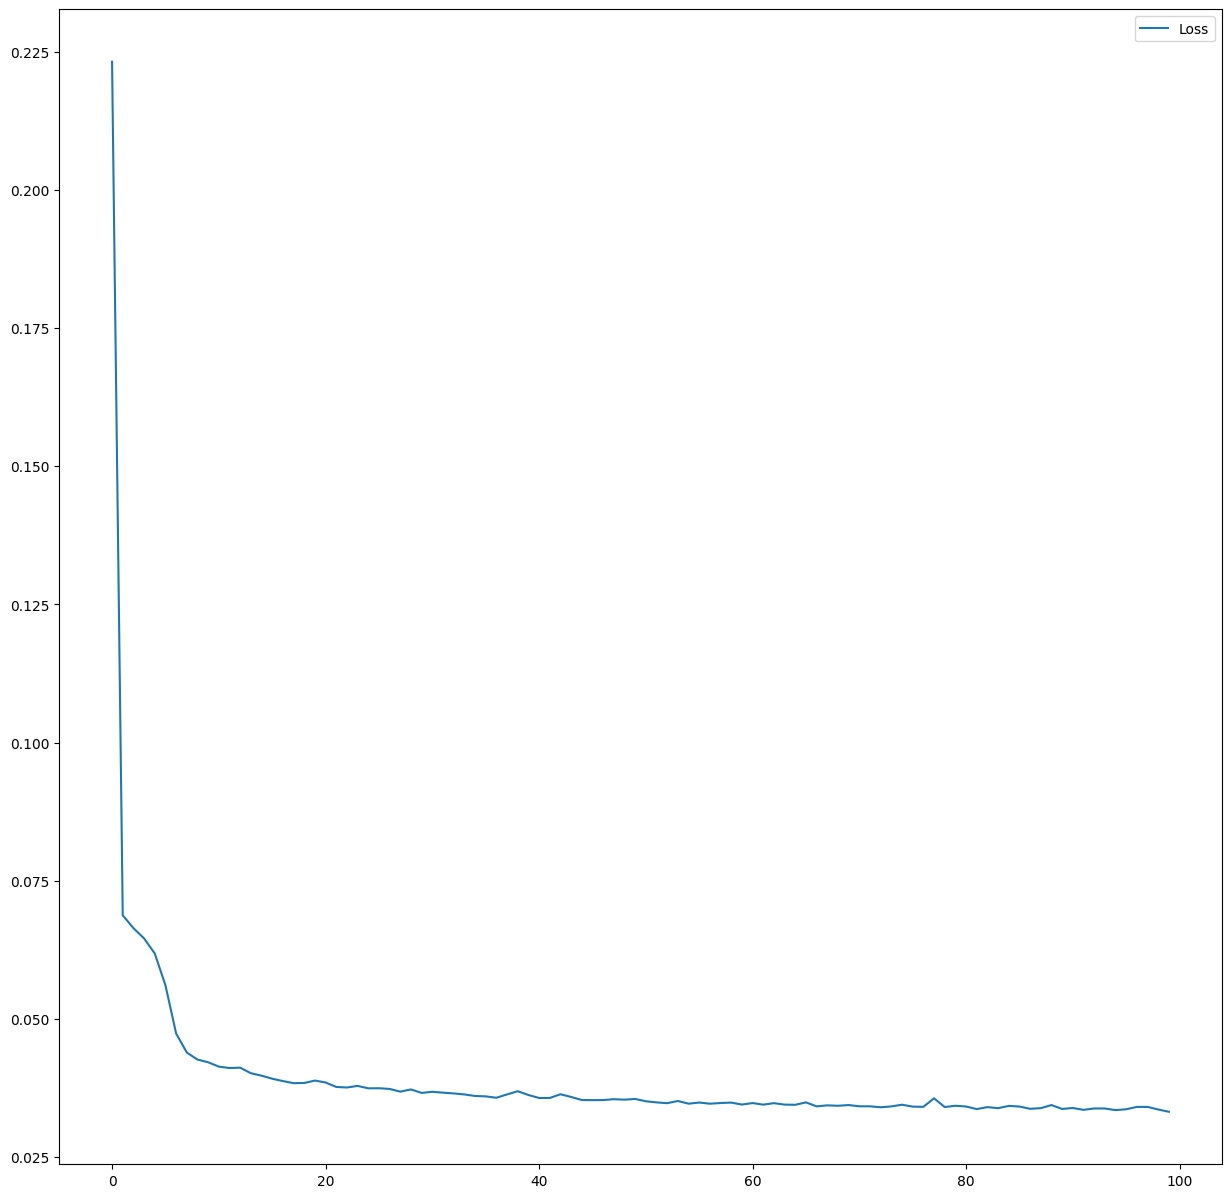

In [11]:
# graficamos la perdida
plt.figure(figsize=(15,15))
plt.plot(history.history["loss"], label="Loss")
plt.legend()
plt.show()

# Pruebas del modelo

In [12]:
# Generamos el forecast, los últimos valores disponibles de la secuencia, los últimos 60 días en este caso
X_ = y[- n_lookback:]
X_.shape

(60, 1)

In [13]:
# Predecimos el modelo con los últimos días
Y_ = model.predict(X_)
Y_

2/2 [==============================] - 1s 0s/step


array([[0.11814525, 0.0809986 , 0.10070263, ..., 0.16577888, 0.15393999,
        0.13755806],
       [0.11522432, 0.07856796, 0.09808162, ..., 0.16473591, 0.15300608,
        0.1366145 ],
       [0.40321547, 0.32630393, 0.3609164 , ..., 0.27603716, 0.2511433 ,
        0.23638842],
       ...,
       [0.3331263 , 0.26475832, 0.29623693, ..., 0.24751699, 0.22636133,
        0.21098104],
       [0.3292785 , 0.26139846, 0.29269782, ..., 0.24597576, 0.22501434,
        0.20960549],
       [0.32543764, 0.2580467 , 0.28916633, ..., 0.2444399 , 0.22367127,
        0.20823443]], dtype=float32)

In [14]:
# Regresamos los valores a sus valores de origen
Y_ = scaler.inverse_transform(Y_)

In [15]:
Y_

array([[ 8.004446 ,  3.286822 ,  5.7892337, ..., 14.053917 , 12.550379 ,
        10.469872 ],
       [ 7.633488 ,  2.9781308,  5.4563656, ..., 13.92146  , 12.431771 ,
        10.350041 ],
       [44.208363 , 34.440598 , 38.836384 , ..., 28.056719 , 24.895199 ,
        23.021328 ],
       ...,
       [35.30704  , 26.624306 , 30.62209  , ..., 24.434658 , 21.747889 ,
        19.794592 ],
       [34.818367 , 26.197605 , 30.172623 , ..., 24.238922 , 21.57682  ,
        19.619896 ],
       [34.330578 , 25.771929 , 29.724123 , ..., 24.043867 , 21.406252 ,
        19.445772 ]], dtype=float32)

## Verificación de la predicción

In [16]:
# Para realizar el forecast con las fechas recuperamos el dataframe original
df = pd.read_excel(ruta_serie)
df

,fecha,dias_sig_mantto
0,2017-02-01,120
1,2017-02-02,119
2,2017-02-03,118
3,2017-02-04,117
4,2017-02-05,116
...,...,...
1605,2021-06-25,104
1606,2021-06-26,103
1607,2021-06-27,102
1608,2021-06-28,101


In [17]:
# Cambiamos los valores para diferenciar los valores anteriores y los nuevos
df_past = df
df_past.rename(columns={'fecha': 'Date', 'dias_sig_mantto': 'Actual'}, inplace=True)
df_past

,Date,Actual
0,2017-02-01,120
1,2017-02-02,119
2,2017-02-03,118
3,2017-02-04,117
4,2017-02-05,116
...,...,...
1605,2021-06-25,104
1606,2021-06-26,103
1607,2021-06-27,102
1608,2021-06-28,101


In [18]:
# Creamos un nuevo Dataframe con la columna "Forecast" llena de valores vacíos, esto para que ahí se agreguen los nuevos valores 
# de predicción
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

C:\Users\Jorge\AppData\Local\Temp\ipykernel_7384\3032417082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]


In [19]:
# Creamos otro dataframe para agregar los nuevos valores de la predicción
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=60)
df_future['Forecast'] = Y_
df_future['Actual'] = np.nan

C:\Users\Jorge\AppData\Local\Temp\ipykernel_7384\820912053.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = df_past.append(df_future).set_index('Date')


<AxesSubplot: title={'center': 'Forecast'}, xlabel='Date'>

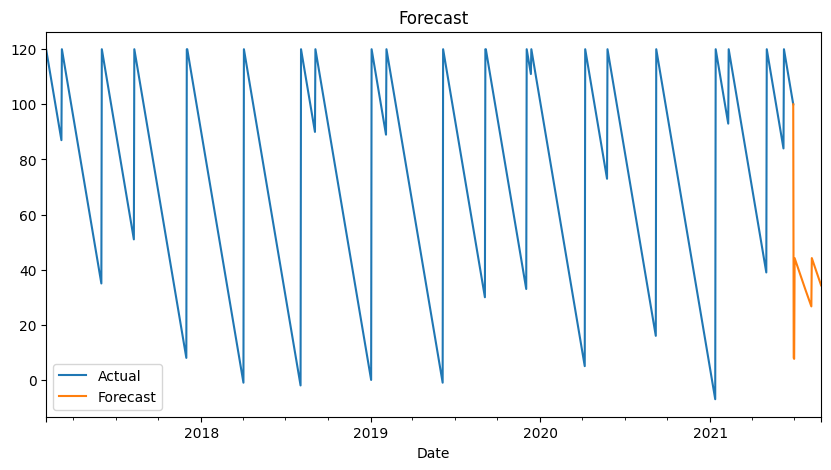

In [20]:
# Utilizamos los valores de ambos dataframe para unirlos por medio del index de la fecha y graficamos la información
results = df_past.append(df_future).set_index('Date')
plt.rcParams["figure.figsize"] = (10, 5)
# plot the results
results.plot(title='Forecast')

## Guardado del modelo en un csv

In [21]:
results.to_csv("./predicciones/"+ruta_serie[-31:-24]+"_prediccion.csv")